### Import libraries

In [7]:
import matplotlib.pyplot as plt
import fiona
from shapely.geometry.geo import shape
from sklearn.cluster import KMeans
import sklearn
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from ipywidgets import interactive, interact
import ipywidgets as widgets

### Use Fiona to import data

In [2]:
data = []
with fiona.open('buildings.gpkg') as src:
    for f in src:
        pt = shape(f['geometry'])
        data.append((pt.x, pt.y))
X = np.array(data)
xlim = (min(X[:, 0]), max(X[:, 0]))
ylim = (min(X[:, 1]), max(X[:, 1]))

 ### Plot data

(172955.3884779056, 174856.1735493605)

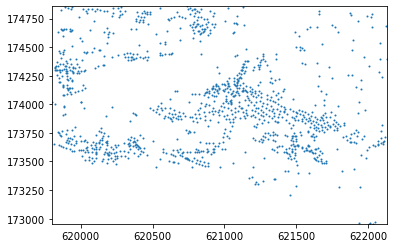

In [14]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.xlim(xlim)
plt.ylim(ylim)

### k-Means clustering for k cluster

In [4]:
def plot_kmeans(k):    
    kmeans = KMeans(n_clusters=k).fit(X)
    y_pred = kmeans.predict(X)
    
    clusters = kmeans.cluster_centers_    
    vor = Voronoi(clusters)
    
    plt.figure()
    plt.title("k = {}".format(k))
    plt.scatter(X[:, 0], X[:, 1], s=1, c=y_pred)
    voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, point_size=10)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

In [5]:
interact(plot_kmeans, k=widgets.IntSlider(min=3, max=50, step=1, value=3, continuous_update=False));

interactive(children=(IntSlider(value=3, continuous_update=False, description='k', max=50, min=3), Output()), …

### Finden des optimalen Werts für k

In [10]:
min(kmeans.labels_)


0

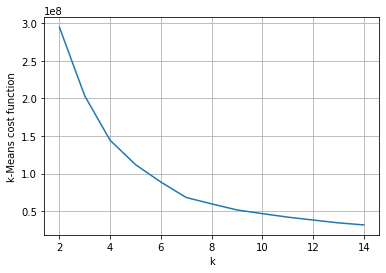

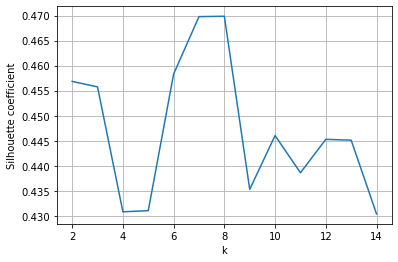

In [13]:
kmeans_loss = []
sil_score = []

ks = range(2, 15, 1)

for k in ks:
    kmeans = KMeans(n_clusters=k).fit(X)
    kmeans_loss.append(kmeans.inertia_)
    sil_score.append(sklearn.metrics.silhouette_score(X, kmeans.labels_))

plt.figure()
plt.plot(ks, kmeans_loss)
plt.xlabel("k")
plt.ylabel("k-Means cost function")
plt.grid()
plt.show()

plt.figure()
plt.plot(ks, sil_score)
plt.xlabel("k")
plt.ylabel("Silhouette coefficient")
plt.grid()
plt.show()